## Regresja logistyczna

### Wczytanie bibliotek i danych

Wymagane biblioteki:
- pandas (pip install pandas)
- sklearn (pip install scikit-learn)
- matplotlib (pip install matplotlib)
- numpy (pip install numpy)

In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn. model_selection import train_test_split
from sklearn import metrics

dane = pd.read_csv('finances.csv', sep=',', decimal='.')
print(dane)


print(dane)
print(dane.info())

      default  student      balance        income
0           0        0   729.526495  44361.625074
1           0        1   817.180407  12106.134700
2           0        0  1073.549164  31767.138947
3           0        0   529.250605  35704.493935
4           0        0   785.655883  38463.495879
...       ...      ...          ...           ...
9995        0        0   711.555020  52992.378914
9996        0        0   757.962918  19660.721768
9997        0        0   845.411989  58636.156984
9998        0        0  1569.009053  36669.112365
9999        0        1   200.922183  16862.952321

[10000 rows x 4 columns]
      default  student      balance        income
0           0        0   729.526495  44361.625074
1           0        1   817.180407  12106.134700
2           0        0  1073.549164  31767.138947
3           0        0   529.250605  35704.493935
4           0        0   785.655883  38463.495879
...       ...      ...          ...           ...
9995        0        0  

### Podział danych na dane wejściowe (treningowe) oraz wyjściowe (odpowiedź)

In [10]:
Input = dane[["student","balance","income"]]
Output = dane["default"]


X = np.array(Input) # wielkie X ponieważ dane wejściowe są złożone 
y = np.array(Output) # małe y ponieważ odpowiedź jest pojedynczą wartością

X_train,X_test,y_train,y_test = train_test_split (X,y,test_size=0.3,random_state=43)

In [5]:
model = LogisticRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

### Predykcja odpowiedzi

In [11]:
# czy_student = int(input("Czy jesteś studentem? NIE:0, TAK:1 "))
# sredni_dochod = float(input("Podaj średni dochód z ostatnich 3 miesięcy: "))
# srednie_saldo = float(input("Podaj średnie saldo z ostatnich 3 miesięcy: "))

czy_student = 1
sredni_dochod = 5000
srednie_saldo = 4000

pred = model.predict([[czy_student,srednie_saldo,sredni_dochod]]) 
print("Ryzykowny klient" if pred == 1 else "Klient godny zaufania")




Ryzykowny klient


## Sprawdzanie modelu

### classification_report

1. Precision: Procent prawidłowych pozytywnych przewidywań w stosunku do wszystkich pozytywnych przewidywań.
2. Recall: Procent prawidłowych pozytywnych przewidywań w stosunku do wszystkich rzeczywistych pozytywnych przewidywań.
3. F1-Score: Ważona średnia harmoniczna precyzji i zapamiętywania (im bliżej 1, tym lepszy model)
4. Support: Liczba wystąpień każdej klasy w y_true.

`F1_Score: 2 * (Precision * Recall) / (Precision + Recall)`


### confusion_matrix

1. [LG] True Positive (TP) - odnosi się do próbki należącej do klasy pozytywnej, która została prawidłowo sklasyfikowana.
2. [PD] True Negative (TN) - odnosi się do próbki należącej do klasy negatywnej, która została prawidłowo sklasyfikowana.
3. [PG] False Positive (FP) - odnosi się do próbki należącej do klasy negatywnej, ale błędnie sklasyfikowanej jako należąca do klasy pozytywnej.
4. [LD] False Negative (FN) - odnosi się do próbki należącej do klasy pozytywnej, ale błędnie sklasyfikowanej jako należąca do klasy negatywnej.

In [13]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

from sklearn.metrics import classification_report

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))


0.9748571428571429
0.97
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2885
           1       0.74      0.34      0.46       115

    accuracy                           0.97      3000
   macro avg       0.86      0.67      0.72      3000
weighted avg       0.97      0.97      0.96      3000

[[2871   14]
 [  76   39]]


## Titanic

C:\Users\mkowa\AppData\Local\Temp\ipykernel_14568\2566090091.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  age = columns[0]
C:\Users\mkowa\AppData\Local\Temp\ipykernel_14568\2566090091.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  passenger_class = columns[1]
C:\Users\mkowa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sho

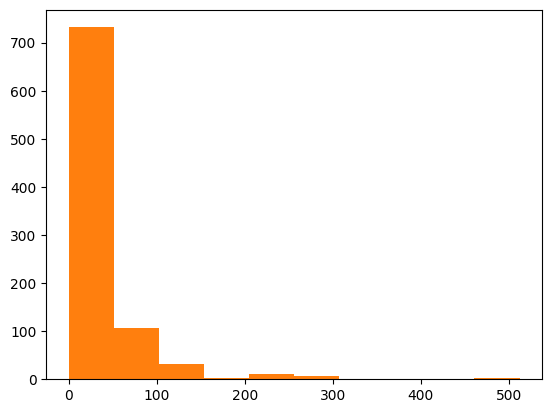

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

titanic_data = pd.read_csv('titanic_train.csv')



plt.hist(titanic_data['Age'].dropna())

plt.hist(titanic_data['Fare'])


#Imputation function

def impute_missing_age(columns):
    age = columns[0]
    passenger_class = columns[1]

    

    if pd.isnull(age):

        if(passenger_class == 1):

            return titanic_data[titanic_data['Pclass'] == 1]['Age'].mean()

        elif(passenger_class == 2):

            return titanic_data[titanic_data['Pclass'] == 2]['Age'].mean()

        elif(passenger_class == 3):

            return titanic_data[titanic_data['Pclass'] == 3]['Age'].mean()

        

    else:

        return age

#Impute the missing Age data

titanic_data['Age'] = titanic_data[['Age', 'Pclass']].apply(impute_missing_age, axis = 1)

#Reinvestigate missing data


#Drop null data

titanic_data.drop('Cabin', axis=1, inplace = True)

titanic_data.dropna(inplace = True)

#Create dummy variables for Sex and Embarked columns

sex_data = pd.get_dummies(titanic_data['Sex'], drop_first = True)

embarked_data = pd.get_dummies(titanic_data['Embarked'], drop_first = True)

#Add dummy variables to the DataFrame and drop non-numeric data

titanic_data = pd.concat([titanic_data, sex_data, embarked_data], axis = 1)

titanic_data.drop(['Name', 'PassengerId', 'Ticket', 'Sex', 'Embarked'], axis = 1, inplace = True)

#Print the finalized data set

titanic_data.head()

#Split the data set into x and y data

y_data = titanic_data['Survived']

x_data = titanic_data.drop('Survived', axis = 1)

#Split the data set into training data and test data

from sklearn.model_selection import train_test_split

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3)

#Create the model

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

#Train the model and create predictions

model.fit(x_training_data, y_training_data)

predictions = model.predict(x_test_data)
